In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder,StandardScaler,scale
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

In [2]:
df= pd.read_csv('/content/drive/MyDrive/MachineLearningCSV/KeystrokeData.csv')

In [3]:
df.head()

,User,H.period,DD.period.t,UD.period.t,H.t,DD.t.i,UD.t.i,H.i,DD.i.e,UD.i.e,...,DD.a.n,UD.a.n,H.n,DD.n.l,UD.n.l,H.l,DD.l.Return,UD.l.Return,H.Return,Target
0,Nikhil,0.119,0.272,0.153,0.103,0.208,0.105,0.103,0.288,0.185,...,0.328,0.225,0.135,0.264,0.129,0.111,0.311,0.200,0.112,Genuine
1,Nikhil,0.119,0.272,0.153,0.103,0.216,0.113,0.103,0.287,0.184,...,0.312,0.209,0.151,0.272,0.121,0.110,0.304,0.194,0.151,Genuine
2,Nikhil,0.127,0.352,0.225,0.143,0.240,0.097,0.143,0.344,0.201,...,0.297,0.154,0.150,0.263,0.113,0.127,0.304,0.177,0.127,Genuine
3,Nikhil,0.122,0.315,0.193,0.127,0.200,0.073,0.111,0.400,0.289,...,0.200,0.089,0.143,0.240,0.097,0.159,0.176,0.017,0.087,Genuine
4,Nikhil,0.143,0.232,0.089,0.119,0.208,0.089,0.127,0.264,0.137,...,0.184,0.041,0.151,0.224,0.073,0.206,0.192,-0.014,0.119,Genuine


In [7]:
df.shape

(1422, 33)

In [8]:
df['Target'].unique()

array(['Genuine', 'Imposter'], dtype=object)

In [9]:
df.describe()

,H.period,DD.period.t,UD.period.t,H.t,DD.t.i,UD.t.i,H.i,DD.i.e,UD.i.e,H.e,...,H.a,DD.a.n,UD.a.n,H.n,DD.n.l,UD.n.l,H.l,DD.l.Return,UD.l.Return,H.Return
count,1422.000000,1422.000000,1422.000000,1422.000000,1422.000000,1422.000000,1422.000000,1422.000000,1422.000000,1422.000000,...,1422.000000,1422.000000,1422.000000,1422.000000,1422.000000,1422.000000,1422.000000,1422.000000,1422.000000,1422.000000
mean,0.107737,0.338850,0.231113,0.102036,0.238796,0.136760,0.098268,0.238694,0.140426,0.116487,...,0.107756,0.200232,0.092476,0.122205,0.250179,0.127973,0.145930,0.200954,0.055025,0.120388
std,0.026404,0.394404,0.399970,0.018015,0.125704,0.128689,0.019057,0.154828,0.155526,0.042225,...,0.025489,0.126976,0.127584,0.029822,0.150096,0.154115,0.060938,0.131279,0.169426,0.037185
min,0.030000,0.071000,-0.026000,0.031000,0.048000,-0.016000,0.062000,0.050000,-0.039000,0.054000,...,0.047000,0.008000,-0.151000,0.032000,0.023000,-0.128000,0.031000,0.040000,-0.184000,0.031000
25%,0.087000,0.207000,0.088000,0.092000,0.176000,0.073000,0.085000,0.160000,0.057000,0.088000,...,0.088000,0.136000,0.032000,0.096000,0.168000,0.041000,0.087000,0.115000,-0.079000,0.087000
50%,0.110500,0.249000,0.137000,0.103000,0.216000,0.111000,0.096000,0.208000,0.105000,0.118000,...,0.105000,0.160000,0.057000,0.125500,0.218500,0.081000,0.138000,0.167000,-0.003500,0.119000
75%,0.127000,0.380000,0.281000,0.112000,0.256000,0.153750,0.111000,0.256000,0.154750,0.135000,...,0.120000,0.207000,0.097000,0.143000,0.272000,0.145000,0.199000,0.256000,0.169000,0.151000
max,0.181000,11.352000,11.265000,0.200000,2.077000,1.906000,0.216000,1.934000,1.803000,1.201000,...,0.319000,1.795000,1.695000,0.247000,2.040000,1.897000,0.335000,2.224000,2.153000,0.271000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1422 entries, 0 to 1421
Data columns (total 33 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   User             1422 non-null   object 
 1   H.period         1422 non-null   float64
 2   DD.period.t      1422 non-null   float64
 3   UD.period.t      1422 non-null   float64
 4   H.t              1422 non-null   float64
 5   DD.t.i           1422 non-null   float64
 6   UD.t.i           1422 non-null   float64
 7   H.i              1422 non-null   float64
 8   DD.i.e           1422 non-null   float64
 9   UD.i.e           1422 non-null   float64
 10  H.e              1422 non-null   float64
 11  DD.e.five        1422 non-null   float64
 12  UD.e.five        1422 non-null   float64
 13  H.five           1422 non-null   float64
 14  DD.five.Shift.r  1422 non-null   float64
 15  UD.five.Shift.r  1422 non-null   float64
 16  H.Shift.r        1422 non-null   float64
 17  DD.Shift.r.o  

**Note**
The Data is Looks to be Clean there is no null value in this data

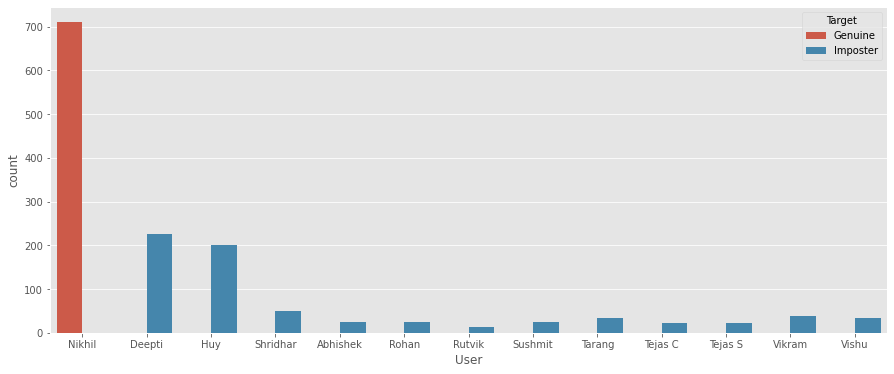

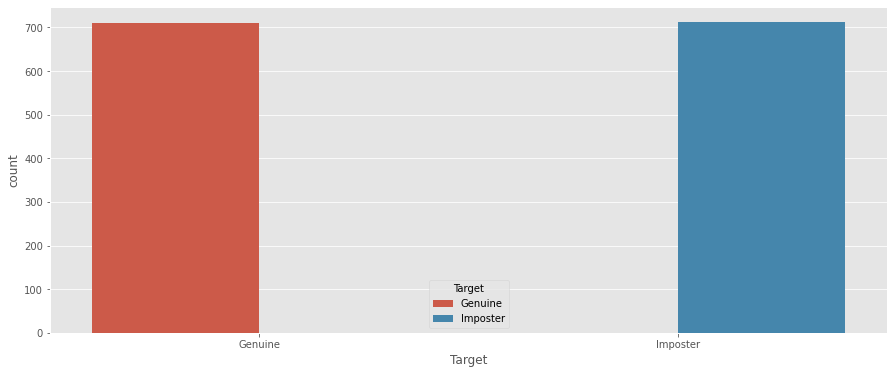

In [11]:
#plot the object features #
plt.style.use('ggplot')
#Create a loop that print all categorical variable against the Target variable
for col in df.select_dtypes('object'):
    plt.figure(figsize=(15,6))
    sns.countplot(x=col,hue='Target',data=df)

In [12]:
df['Target'] = df['Target'].replace(('Imposter','Genuine'),(0,1))

In [13]:
df.head()

,User,H.period,DD.period.t,UD.period.t,H.t,DD.t.i,UD.t.i,H.i,DD.i.e,UD.i.e,...,DD.a.n,UD.a.n,H.n,DD.n.l,UD.n.l,H.l,DD.l.Return,UD.l.Return,H.Return,Target
0,Nikhil,0.119,0.272,0.153,0.103,0.208,0.105,0.103,0.288,0.185,...,0.328,0.225,0.135,0.264,0.129,0.111,0.311,0.200,0.112,1
1,Nikhil,0.119,0.272,0.153,0.103,0.216,0.113,0.103,0.287,0.184,...,0.312,0.209,0.151,0.272,0.121,0.110,0.304,0.194,0.151,1
2,Nikhil,0.127,0.352,0.225,0.143,0.240,0.097,0.143,0.344,0.201,...,0.297,0.154,0.150,0.263,0.113,0.127,0.304,0.177,0.127,1
3,Nikhil,0.122,0.315,0.193,0.127,0.200,0.073,0.111,0.400,0.289,...,0.200,0.089,0.143,0.240,0.097,0.159,0.176,0.017,0.087,1
4,Nikhil,0.143,0.232,0.089,0.119,0.208,0.089,0.127,0.264,0.137,...,0.184,0.041,0.151,0.224,0.073,0.206,0.192,-0.014,0.119,1


In [14]:
usr_num=df['User'].value_counts()
print(usr_num)

Nikhil      710
Deepti      225
Huy         200
Shridhar     50
Vikram       38
Tarang       33
Vishu        33
Rohan        25
Sushmit      25
Abhishek     24
Tejas C      23
Tejas S      22
Rutvik       14
Name: User, dtype: int64


In [15]:
df['User'] = df['User'].replace(('Nikhil','Deepti','Huy','Shridhar','Vikram',
                                     'Tarang','Vishu','Rohan','Sushmit','Abhishek','Tejas C','Tejas S','Rutvik'),
                                    (usr_num[0]/sum(usr_num),usr_num[1]/sum(usr_num),usr_num[2]/sum(usr_num),usr_num[3]/sum(usr_num),
                                     usr_num[4]/sum(usr_num),usr_num[5]/sum(usr_num),usr_num[6]/sum(usr_num),
                                     usr_num[7]/sum(usr_num),usr_num[8]/sum(usr_num),usr_num[9]/sum(usr_num),usr_num[10]/sum(usr_num),
                                     usr_num[11]/sum(usr_num),usr_num[12]/sum(usr_num)))

**Note** I assign weights to each user according to counts of their data values.

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1422 entries, 0 to 1421
Data columns (total 33 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   User             1422 non-null   float64
 1   H.period         1422 non-null   float64
 2   DD.period.t      1422 non-null   float64
 3   UD.period.t      1422 non-null   float64
 4   H.t              1422 non-null   float64
 5   DD.t.i           1422 non-null   float64
 6   UD.t.i           1422 non-null   float64
 7   H.i              1422 non-null   float64
 8   DD.i.e           1422 non-null   float64
 9   UD.i.e           1422 non-null   float64
 10  H.e              1422 non-null   float64
 11  DD.e.five        1422 non-null   float64
 12  UD.e.five        1422 non-null   float64
 13  H.five           1422 non-null   float64
 14  DD.five.Shift.r  1422 non-null   float64
 15  UD.five.Shift.r  1422 non-null   float64
 16  H.Shift.r        1422 non-null   float64
 17  DD.Shift.r.o  

In [17]:
y= df['Target']
x= df= df.drop(['Target'],axis=1)

In [18]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1422 entries, 0 to 1421
Data columns (total 32 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   User             1422 non-null   float64
 1   H.period         1422 non-null   float64
 2   DD.period.t      1422 non-null   float64
 3   UD.period.t      1422 non-null   float64
 4   H.t              1422 non-null   float64
 5   DD.t.i           1422 non-null   float64
 6   UD.t.i           1422 non-null   float64
 7   H.i              1422 non-null   float64
 8   DD.i.e           1422 non-null   float64
 9   UD.i.e           1422 non-null   float64
 10  H.e              1422 non-null   float64
 11  DD.e.five        1422 non-null   float64
 12  UD.e.five        1422 non-null   float64
 13  H.five           1422 non-null   float64
 14  DD.five.Shift.r  1422 non-null   float64
 15  UD.five.Shift.r  1422 non-null   float64
 16  H.Shift.r        1422 non-null   float64
 17  DD.Shift.r.o  

**NOTE**
I am going to use **ExtraTreesClassifier** to find the value of importance of each attribute then we will choose 10 attributes with maximum value for training.



In [21]:
model = ExtraTreesClassifier(n_estimators=10)
model.fit(x, y)
a=model.feature_importances_

In [23]:
ind = np.argpartition(a, -10)[-10:]
print(ind)
print(a[ind])

[29  7  6  1  2 28 31 18 30  0]
[0.01535909 0.01814718 0.0186703  0.03483624 0.02996861 0.02367536
 0.03992539 0.13071755 0.04409908 0.57569624]


**NOTE**
We Find the importance of each feature Now we will choose the 10 feature with highest value of importance.to train our algorithem.

In [24]:
c=df.columns[ind[0]]
b=df[c]
train=b
for i in range(len(ind)-1):
  c=df.columns[ind[i+1]]
  b=df[c]
  train= pd.concat([train, b], axis = 1)

In [25]:
train = train.drop(['User'],axis=1)

Removing **users** from training data.

In [26]:
train.head()

,DD.l.Return,H.i,UD.t.i,H.period,DD.period.t,H.l,H.Return,UD.Shift.r.o,UD.l.Return
0,0.311,0.103,0.105,0.119,0.272,0.111,0.112,-0.055,0.200
1,0.304,0.103,0.113,0.119,0.272,0.110,0.151,-0.064,0.194
2,0.304,0.143,0.097,0.127,0.352,0.127,0.127,-0.071,0.177
3,0.176,0.111,0.073,0.122,0.315,0.159,0.087,-0.055,0.017
4,0.192,0.127,0.089,0.143,0.232,0.206,0.119,-0.063,-0.014


**Note**
 These are our Most Important attribute on which we train our algorithem.

In [27]:
models =["SVM","Naive Bais","GradientBoosting","DecisionTree","KNN"," Logistic Regression","Random Forest"]
acc_sc=[]

In [28]:
X_train, X_test, y_train, y_test = train_test_split(train,y,test_size = 0.30, random_state = 32)
model = SVC()
model.fit(X_train, y_train)
# print prediction results
predictions = model.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       207
           1       0.99      0.98      0.98       220

    accuracy                           0.98       427
   macro avg       0.98      0.98      0.98       427
weighted avg       0.98      0.98      0.98       427



**Note**
Our Accuracy is truns out to be 100% using svm 

In [29]:
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}
 
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
 
# fitting the model for grid search
grid.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.899 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.899 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.869 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.874 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.879 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.769 total time=   0.1s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.809 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.759 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.819 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.779 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.508 total time=   0.1s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [30]:
# print best parameter after tuning
print(grid.best_params_)
 
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'C': 1000, 'gamma': 1, 'kernel': 'rbf'}
SVC(C=1000, gamma=1)


In [31]:
grid_predictions = grid.predict(X_test)
# print classification report
acc_sc.append(accuracy_score(y_test,grid_predictions))
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       207
           1       1.00      0.99      0.99       220

    accuracy                           0.99       427
   macro avg       0.99      0.99      0.99       427
weighted avg       0.99      0.99      0.99       427



Accuracy of **SVM** is 99%

In [32]:
param_grid_nb = {
    'var_smoothing': np.logspace(0,-9, num=100)
}
nbModel_grid = GridSearchCV(estimator=GaussianNB(), param_grid= param_grid_nb, verbose=1, cv=10, n_jobs=-1) 

In [33]:
nbModel_grid.fit(X_train, y_train)
print(nbModel_grid.best_estimator_)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
GaussianNB(var_smoothing=0.0006579332246575676)


In [34]:
y_pred = nbModel_grid.predict(X_test)
acc_sc.append(accuracy_score(y_test,y_pred))

In [35]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.93      0.95       207
           1       0.94      0.97      0.95       220

    accuracy                           0.95       427
   macro avg       0.95      0.95      0.95       427
weighted avg       0.95      0.95      0.95       427



**Note**
The Accuracy of Naive Bais is also comes out to be 95% 

In [36]:
gbc = GradientBoostingClassifier()
parameters = {
    "n_estimators":[5,50,250,500],
    "max_depth":[1,3,5,7,9],
    "learning_rate":[0.01,0.1,1,10,100]
}

In [37]:
cv = GridSearchCV(gbc,parameters,cv=5)
cv.fit(X_train,y_train.values.ravel())

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.01, 0.1, 1, 10, 100],
                         'max_depth': [1, 3, 5, 7, 9],
                         'n_estimators': [5, 50, 250, 500]})

In [38]:
y_pred= cv.predict(X_test)
acc_sc.append(accuracy_score(y_test,y_pred))
print((classification_report(y_test,y_pred)))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       207
           1       1.00      0.99      0.99       220

    accuracy                           0.99       427
   macro avg       0.99      0.99      0.99       427
weighted avg       0.99      0.99      0.99       427



The Accuracy of **GradientBoostingClassifier** is also truns out to be 99%

In [39]:
std_slc = StandardScaler()
dec_tree = tree.DecisionTreeClassifier()
pipe = Pipeline(steps=[('std_slc', std_slc),
                           ('dec_tree', dec_tree)])
criterion = ['gini', 'entropy']
max_depth = [2,4,6,8,10,12]
parameters = dict(dec_tree__criterion=criterion,
                      dec_tree__max_depth=max_depth)

In [40]:
clf_GS = GridSearchCV(pipe, parameters)
clf_GS.fit(X_train,y_train)

GridSearchCV(estimator=Pipeline(steps=[('std_slc', StandardScaler()),
                                       ('dec_tree', DecisionTreeClassifier())]),
             param_grid={'dec_tree__criterion': ['gini', 'entropy'],
                         'dec_tree__max_depth': [2, 4, 6, 8, 10, 12]})

In [41]:
print('Best Criterion:', clf_GS.best_estimator_.get_params()['dec_tree__criterion'])
print('Best max_depth:', clf_GS.best_estimator_.get_params()['dec_tree__max_depth'])
print(); print(clf_GS.best_estimator_.get_params()['dec_tree'])

Best Criterion: entropy
Best max_depth: 4

DecisionTreeClassifier(criterion='entropy', max_depth=4)


In [42]:
dec_tree = tree.DecisionTreeClassifier(criterion='gini',max_depth=4)
dec_tree.fit(X_train,y_train)
y_pred= dec_tree.predict(X_test)
acc_sc.append(accuracy_score(y_test,y_pred))
print((classification_report(y_test,y_pred)))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97       207
           1       0.99      0.96      0.97       220

    accuracy                           0.97       427
   macro avg       0.97      0.97      0.97       427
weighted avg       0.97      0.97      0.97       427



**Note** The accuracy of **DecisionTree** is also 97% 

In [43]:
n_neig=0
ac=0
for i in range(3,25):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train,y_train)
  y_pred=knn.predict(X_test)
  accuracy= accuracy_score(y_test,y_pred)
  if accuracy>ac:
    ac=accuracy
    n_neig=i

print("Best Accuracy is ",ac,"Number neighbors are ",n_neig)

Best Accuracy is  0.990632318501171 Number neighbors are  8


In [44]:
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
acc_sc.append(accuracy_score(y_test,y_pred))
print((classification_report(y_test,y_pred)))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       207
           1       1.00      0.99      0.99       220

    accuracy                           0.99       427
   macro avg       0.99      0.99      0.99       427
weighted avg       0.99      0.99      0.99       427



**Note** The Accuracy of **KNN Classifier** is 99%

In [45]:
grid={"C":np.logspace(-3,3,7)} 
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,grid,cv=10)
logreg_cv.fit(X_train,y_train)
print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 100.0}
accuracy : 0.9708787878787877


In [46]:
logreg=LogisticRegression(C=1)
logreg.fit(X_train,y_train)
y_pred=logreg.predict(X_test)
acc_sc.append(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.89      0.91       207
           1       0.90      0.93      0.91       220

    accuracy                           0.91       427
   macro avg       0.91      0.91      0.91       427
weighted avg       0.91      0.91      0.91       427



**Note** The Accuracy of **Logistic Regression** is 91%

In [47]:
rfc=RandomForestClassifier(random_state=42)
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 500]})

In [48]:
CV_rfc.best_params_

{'criterion': 'entropy',
 'max_depth': 5,
 'max_features': 'auto',
 'n_estimators': 500}

In [49]:
rfc1=RandomForestClassifier(random_state=42, max_features='auto', n_estimators= 500, max_depth=5, criterion='entropy')

In [50]:
rfc1.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=5, n_estimators=500,
                       random_state=42)

In [51]:
pred=rfc1.predict(X_test)
acc_sc.append(accuracy_score(y_test,pred))

In [52]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       207
           1       1.00      0.99      0.99       220

    accuracy                           0.99       427
   macro avg       0.99      0.99      0.99       427
weighted avg       0.99      0.99      0.99       427



**Note** Accuracy of **Random Forest** is 99%

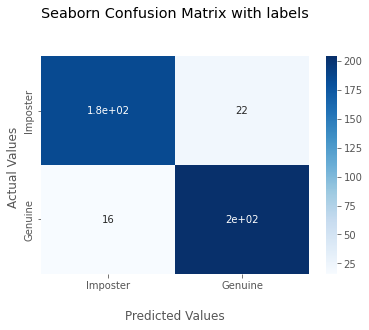

In [53]:
cf_matrix = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Imposter','Genuine'])
ax.yaxis.set_ticklabels(['Imposter','Genuine'])

## Display the visualization of the Confusion Matrix.
plt.show()

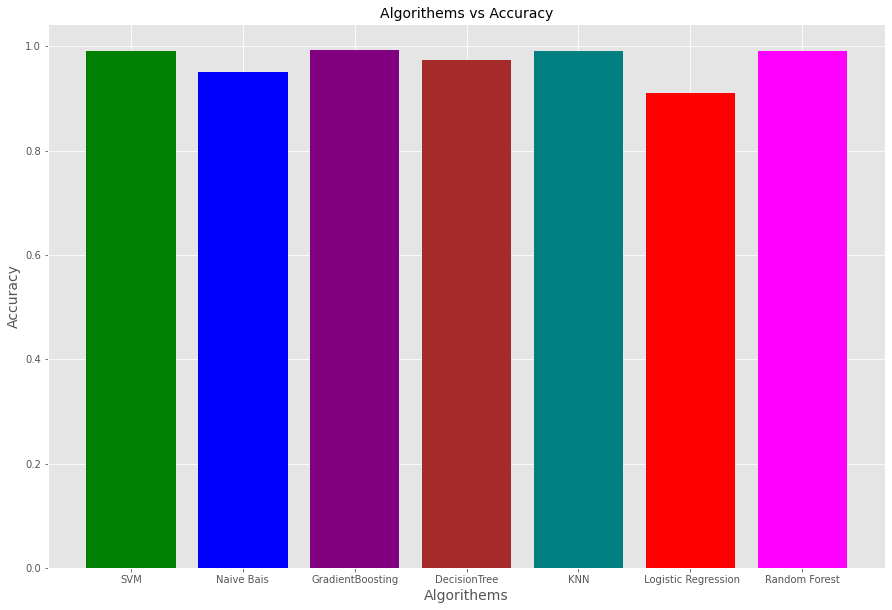

In [54]:
from IPython.core.pylabtools import figsize
New_Colors = ['green','blue','purple','brown','teal','red','magenta']
plt.figure(figsize=(15,10))
plt.bar(models, acc_sc, color=New_Colors)
plt.title('Algorithems vs Accuracy', fontsize=14)
plt.xlabel('Algorithems', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.grid(True)
plt.show()